# Data Analysis

In [1]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#for the yeo-johnson transform
import scipy.stats as stats

#to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [3]:
#Load the data
data = pd.read_csv(r'..\..\data\train.csv')

#rows and columns of the data
print(data.shape)

#visualise the dataset
data.head()


(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Drop id, it is just a number given to identify each house
data.drop(['Id'], axis=1, inplace=True)

data.shape

(1460, 80)

The house price dataset contains 1460 rows, that is, houses, and 80 columns, i.e., variables.

79 are predictive variables and 1 is the target variable: SalePrice

# Analysis
### We will analyse the following:

1.The target variable
2.Variable types (categorical and numerical)
3.Missing data
4.Numerical variables

- Discrete
- Continuous
- Distributions
- Transformations

5.Categorical variables
- Cardinality
- Rare Labels- Special mappings

6.Additional Reading Resources

### Target

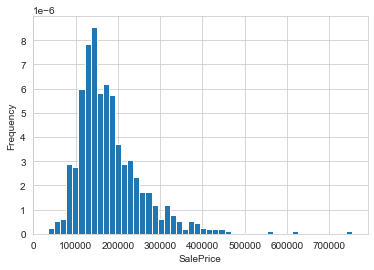

In [5]:
#histogram to evaluate target distribution
data['SalePrice'].hist(bins=50, density=True)
plt.ylabel('Frequency')
plt.xlabel('SalePrice')
plt.show()

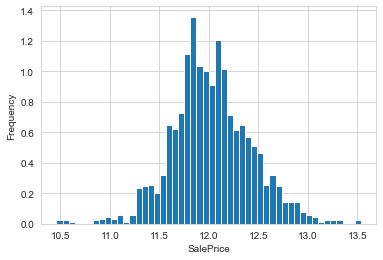

In [6]:
# Lets transform the target using the logarithm
np.log(data['SalePrice']).hist(bins=50, density=True)
plt.ylabel('Frequency')
plt.xlabel('SalePrice')
plt.show()

Now the distribuiton looks more Gaussian

### Variable Types

In [7]:
#lets identifity the categorical variables

cat_vars = [var for var in data.columns if data[var].dtype == 'object']

# MSSubClass is also categorical by definition, despite its numeric values
# (you can find the definitions of the variables in the data_description.txt
# file available on Kaggle, in the same website where you downloaded the data)

cat_vars = cat_vars + ['MSSubClass']

len(cat_vars)

44

In [8]:
#cast all variables as categorical
data[cat_vars] = data[cat_vars].astype('O')

In [10]:
#now lets identify the numerical variables

num_vars = [
    var for var in data.columns if var not in cat_vars and var != 'SalePrice'
]
len(num_vars)

35

### Missing Data

In [12]:
#make a list of the variables that contain missing values

vars_with_na = [
    var for var in data.columns if data[var].isnull().sum() > 0
]

data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

Our dataset contains a few variables with a big proportion of missing values (4 variables at the top). And some other variables with a small percentage of missing observations.

This means that to train a machine learning model with this data set, we need to impute the missing data in these variables.

We can also visualize the percentage of missing values in the variables as follows:

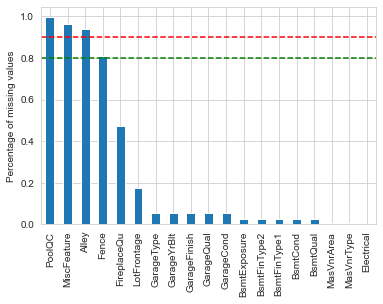

In [13]:
#plot

data[vars_with_na].isnull().mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Percentage of missing values')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.axhline(y=0.8, color='g', linestyle='--')
plt.show()

In [14]:
#now we can determine witch variables, from those with missing data, are numerical and wich are categorical.

cat_na = [
    var for var in cat_vars if var in vars_with_na
]
num_na = [
    var for var in num_vars if var in vars_with_na
]
print('Number of categorical variables with missing data:', len(cat_na))
print('Number of numerical variables with missing data:', len(num_na))

Number of categorical variables with missing data: 16
Number of numerical variables with missing data: 3


In [15]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [16]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Relationship between missing data and Sale Price
Lets evalute the price of the house in those observations where the information is missing. We will do this for each variable that show missing data

In [20]:
def analyse_na_value(df, var):
    '''
    This function will analyse the missing data in a variable and return the following:
    :param df:
    :param var:
    :return:
    '''
    df = df.copy()

    df[var] = np.where(df[var].isnull(),1,0)

    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])
    tmp.plot(
        kind="barh",
        y="mean",
        legend=False,
        xerr="std",
        title='Sale Price',
        color='blue',
        figsize=(12,6)
    );plt.show()


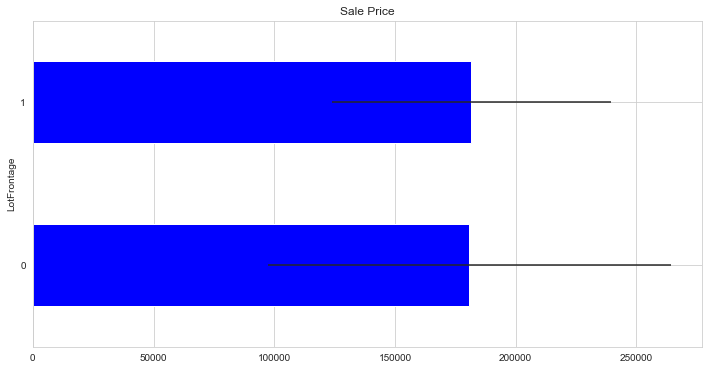

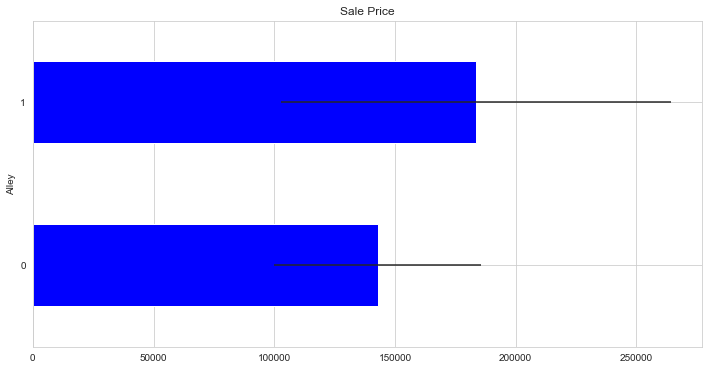

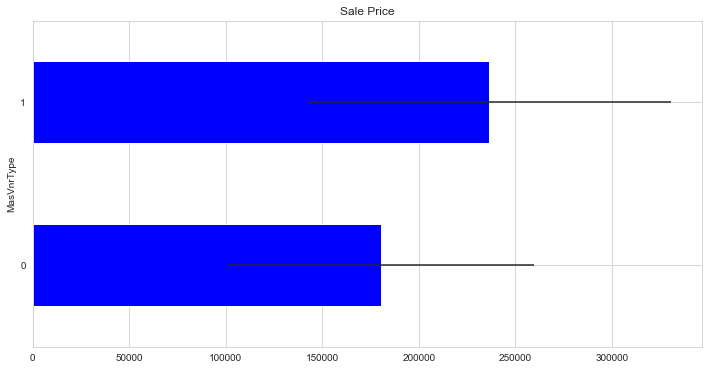

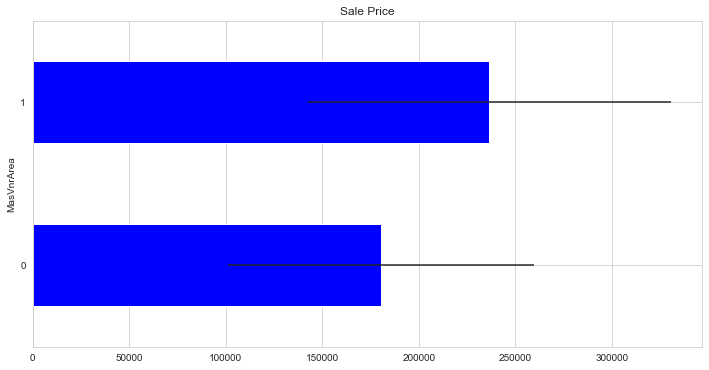

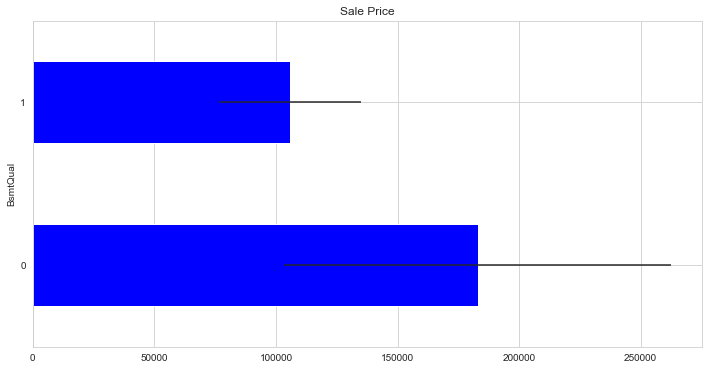

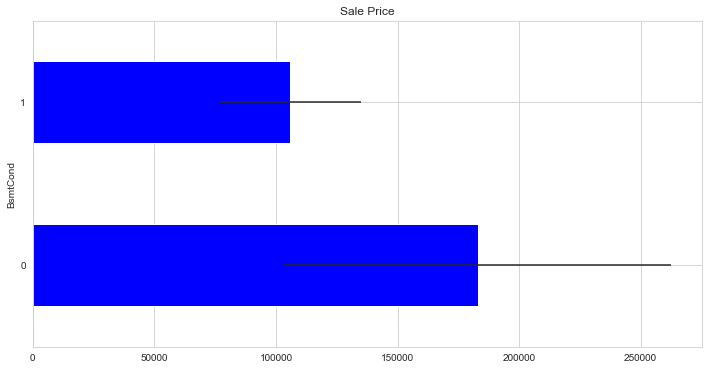

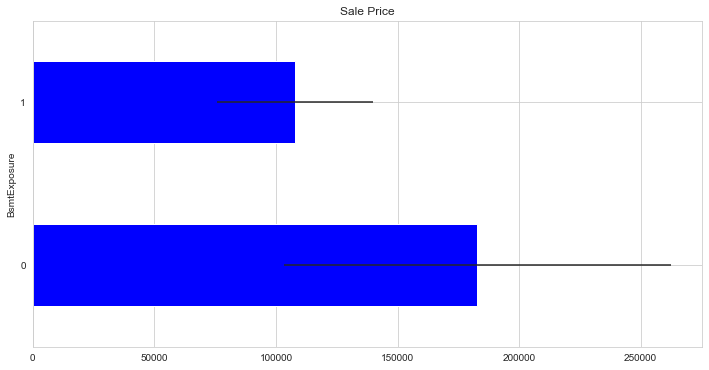

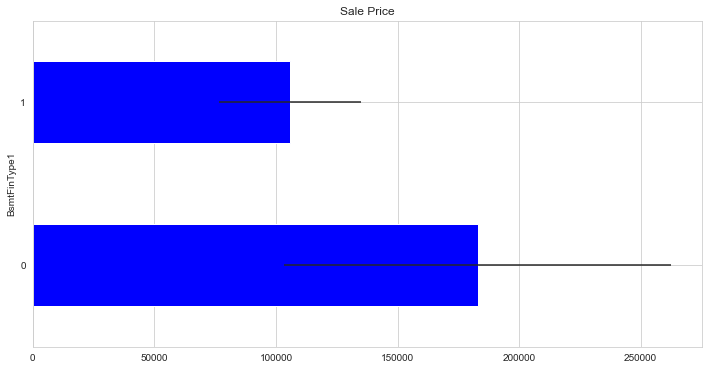

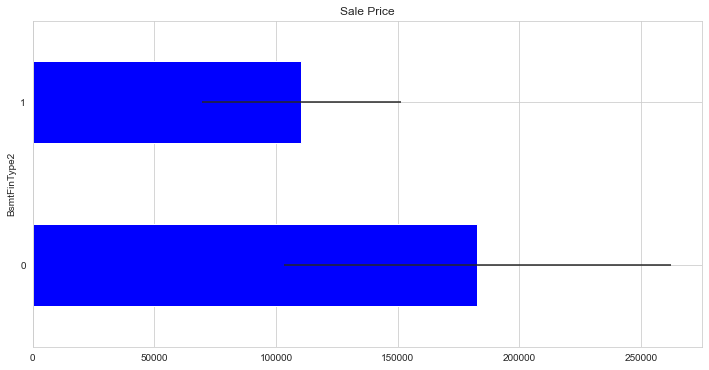

E:\CASSIO\07 - SAUDEID\TRABALHO\CIENTISTA DE DADOS\-Deployment-of-Machine-Learning-Models\venv\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
E:\CASSIO\07 - SAUDEID\TRABALHO\CIENTISTA DE DADOS\-Deployment-of-Machine-Learning-Models\venv\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


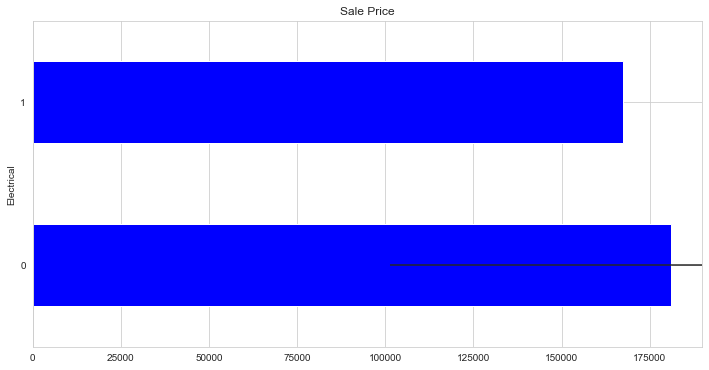

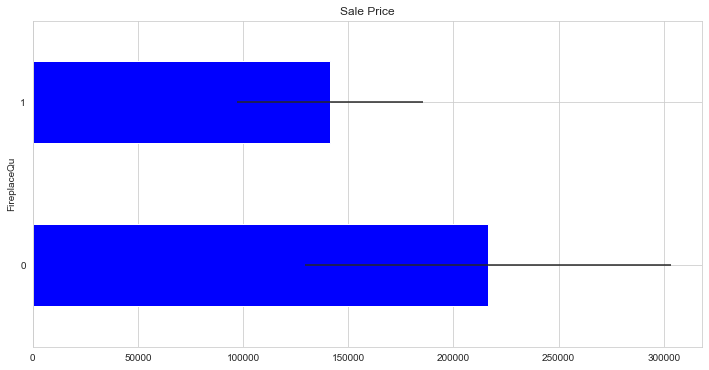

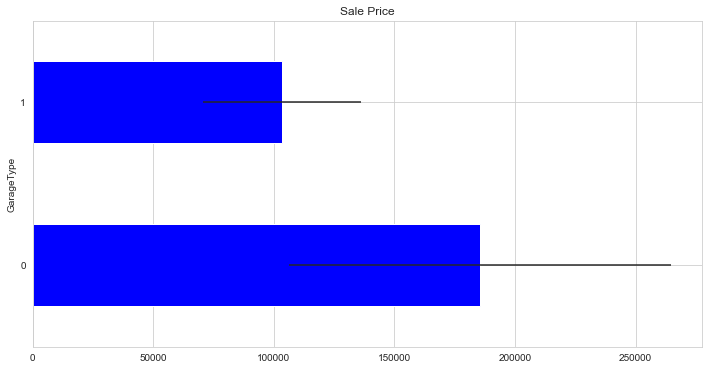

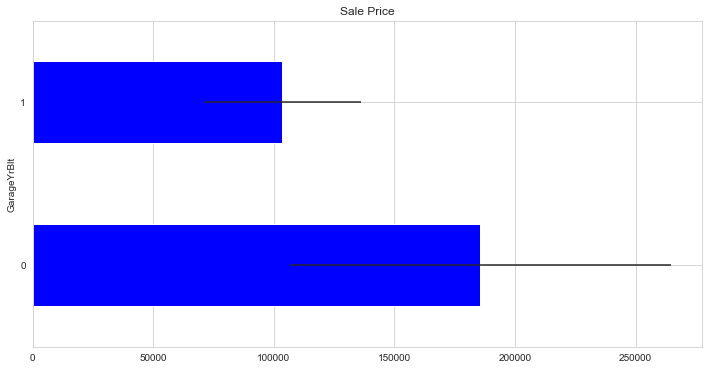

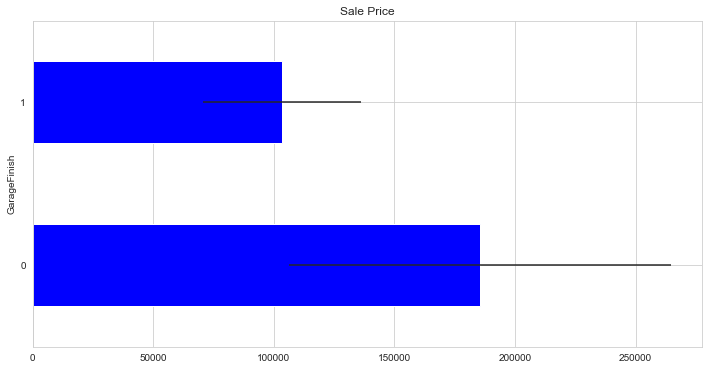

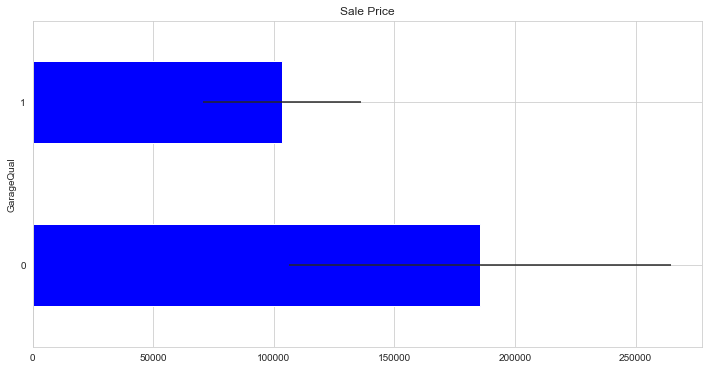

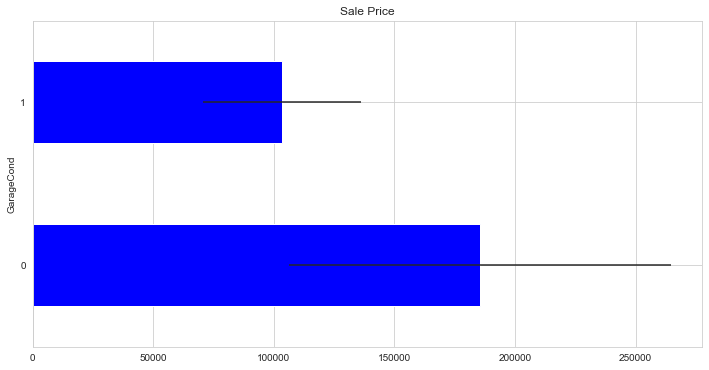

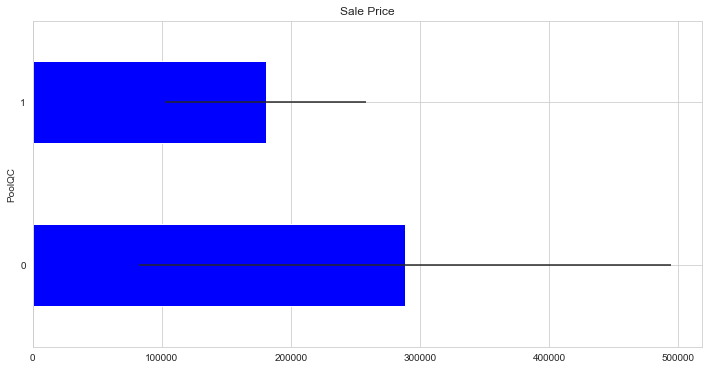

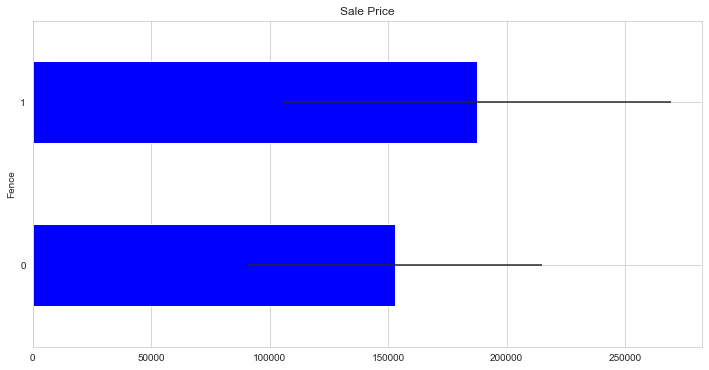

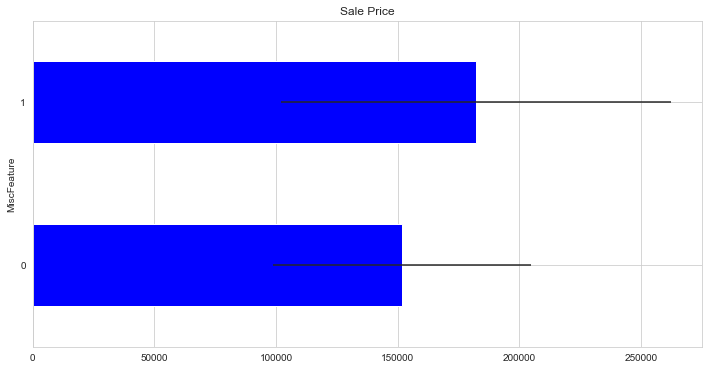

In [21]:
#lets run the function on each variable with missing data

for var in vars_with_na:
    analyse_na_value(data, var)

In some variables, the average Sale Price in houses where the information is missing, differs from the average Sale Price in houses where information exists. This suggests that data being missing could be a good predictor of Sale Price.

### Numerical Variables